In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangling Footballer Names Data
#
##########################################################################################

In [ ]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_Fottballer_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub push
#
##################################################################################################################


# Python used in this exercise
- File Input/Output
- for loop
- list
    - list methods: 
        - join()
    - list comprehension
- string
    - string methods
        - split()
        - strip()
        - slice 

In [21]:
# Python stuff used here:


the_things = [1, 2, 'A', "B", 9.4, set([1,2])]

# for loops repeat code once for each thing in the_things
for this_thing in the_things:
    print('The current thing is: ', this_thing)


The current thing is:  1
The current thing is:  2
The current thing is:  A
The current thing is:  B
The current thing is:  9.4
The current thing is:  {1, 2}


In [23]:
# Strings can be "split" into a list, on a boundary marker which you provide
string2split = '''Hello.  My name is Inigo Montoya. You killed my brother.  Prepare to die'''
print(string2split)

# split on "." 
# Note that a list of strings is returned.
# and that the split boundary character is removed.
string2split.split(".")



Hello.  My name is Inigo Montoya. You killed my brother.  Prepare to die


['Hello',
 '  My name is Inigo Montoya',
 ' You killed my brother',
 '  Prepare to die']

In [35]:
# Mini wrangle goals:
#  1) remove stray space characters
#  2) Correct "brother" to be "father"
#  3) Write as 4 sentences, returning the "." characters

for chunk in string2split.split("."):
    print(chunk)
    chunk=chunk.strip()
    print(chunk) # strip removes whitespace from the ends

    chunk = chunk.replace('brother', 'father')
    print(chunk+'.')
    

Hello
Hello
Hello.
  My name is Inigo Montoya
My name is Inigo Montoya
My name is Inigo Montoya.
 You killed my brother
You killed my brother
You killed my father.
  Prepare to die
Prepare to die
Prepare to die.


In [36]:
for chunk in string2split.split("."):
    chunk=chunk.strip()

    chunk = chunk.replace('brother', 'father')
    print(chunk+'.')

Hello.
My name is Inigo Montoya.
You killed my father.
Prepare to die.


In [42]:
#A different approach using a for-loop shortcut called
#    a List Comprehension
output = [xx.strip().replace("brother", "father") for xx in string2split.split(".")]
print(output)

print('.\n'.join(output))


['Hello', 'My name is Inigo Montoya', 'You killed my father', 'Prepare to die']
Hello.
My name is Inigo Montoya.
You killed my father.
Prepare to die


In [44]:
# as a 1-liner
print('.\n'.join([xx.strip().replace("brother", "father") for xx in string2split.split(".")]))


Hello.
My name is Inigo Montoya.
You killed my father.
Prepare to die


# Wrangling Footballer Birthdays


In [2]:
# Goal: extract footballer's dates of birth 
#  
#
# General info & data here:
#   https://www.kaggle.com/datasets/maso0dahmed/football-players-data
#
# I unzipped mine put it in the data folder
#data = '../data/fifa_players.csv'

data = '../../../Modules/Module_1/data/fifa_players.csv'

The path in "data" is relative to the current working directory.
To see your current working directory, do:

In [1]:
pwd

'/Users/irenaf/BIOS6644_Spring_2024/students/Irena_Frenkel/Module_1'

In [5]:
#read data
with open(data,'r', encoding='utf-8') as thefile:
    lines = thefile.readlines()

# Some operating systems assume that characters are coded in ASCII by default;  
# ASCII doesn't support many languages
# The "encoding" argument ensures that the the characters are read as utf-8
#  https://en.wikipedia.org/wiki/UTF-8
    

In [4]:
# This is how many rows (players) in the dataset
len(lines)

17955

--- 5 Feb Lecture made it this far

In [6]:
testnum = 33
test_line = lines[testnum]
header = lines[0]
print(header, test_line)

name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,release_clause_euro,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
 Kepa,Kepa Arrizabalaga,10/3/1994,24,185.42,84.8,GK,Spain,84,90,31000000,92000,Right,1,4,1,Lean,63600000,Spain,85,SUB,13,25,11,17,32,18,10,25,19,36,16,34,33,41,79,39,25,71,37,51,14,18,21,15,55,24,63,19,18,16



In [7]:
# Notice that the player DOBN is in the 3rd field (field 2)
# The string split(',') method divides a string into a list of strings, 
# breaking on commas. 
print(test_line.split(','))

['Kepa', 'Kepa Arrizabalaga', '10/3/1994', '24', '185.42', '84.8', 'GK', 'Spain', '84', '90', '31000000', '92000', 'Right', '1', '4', '1', 'Lean', '63600000', 'Spain', '85', 'SUB', '13', '25', '11', '17', '32', '18', '10', '25', '19', '36', '16', '34', '33', '41', '79', '39', '25', '71', '37', '51', '14', '18', '21', '15', '55', '24', '63', '19', '18', '16\n']


In [8]:
test_line.split(',')[2]  # split and grab position-2 entry

'10/3/1994'

In [9]:
# Split the name up into a list
test_line.split(',')[2].split('/')

['10', '3', '1994']

In [19]:
# split the date of birth into different fields
dob_list = test_line.split(',')[2].split('/')
print(dob_list)

['10', '3', '1994']


In [63]:
# Set each member of the list to a meaningful name
dob_list = test_line.split(',')[2].split('/')
month = dob_list[0]
day = dob_list[1]
year = dob_list[2]

print(f'''
Birthday for element {testnum}:
    Day:   {day}
    Month: {month}
    Year:  {year}
      ''')


Birthday for element 33:
    Day:   3
    Month: 10
    Year:  1994
      


In [64]:
# print dob as a csv
for theplayer in lines:
    dob_list = theplayer.split(',')[2].split('/')
    print(','.join(dob_list))

# notice top line says "birth_date".  Skip that one!

birth_date
6,24,1987
2,14,1992
3,15,1993
6,4,1991
6,20,1991
7,8,1991
12,20,1998
6,2,1988
3,27,1986
2,14,1987
7,16,1988
5,11,1992
4,30,1992
3,21,1991
6,15,1992
11,15,1993
2,11,1995
5,4,1985
12,10,1987
3,10,1988
4,24,1987
5,6,1987
5,12,1988
3,2,1989
3,21,1989
4,11,1991
2,20,1990
12,15,1986
4,21,1992
7,12,1991
2,23,1992
2,19,1993
10,3,1994
3,19,1993
10,23,1993
12,5,1995
3,6,1996
9,3,1995
9,8,1994
12,15,1992
1,20,1995
7,18,1993
6,12,1996
1,21,1996
5,15,1997
5,11,1984
10,3,1981
12,20,1991
2,17,1990
7,14,1995
5,6,1994
4,7,1992
5,16,1989
9,4,1993
7,1,1991
1,4,1992
2,6,1995
4,3,1995
1,12,1995
5,27,1994
2,1,1994
6,13,1996
11,12,1995
2,11,1996
8,3,1993
6,17,1995
12,13,1994
7,30,1995
2,26,1997
2,11,1996
11,29,1996
4,9,1996
4,3,1996
5,12,1997
2,29,1988
2,29,1984
2,29,1988
8,12,1996
6,22,1996
1,25,1985
3,19,1988
6,17,1990
2,23,1988
4,19,1989
1,26,1987
9,8,1989
5,31,1990
5,6,1990
7,23,1987
9,19,1990
12,26,1990
8,12,1990
6,7,1988
1,13,1988
8,22,1989
2,15,1993
1,6,1993
6,25,1991
1,10,1992
2,19,1991
7,

In [10]:
# print dob as a csv

# print a new header row
print(','.join(['month','day','year']))
for theplayer in lines[1:]:  # skip the first (header) row with a slice
    dob_list = theplayer.split(',')[2].split('/')
    print(','.join(dob_list))

month,day,year
6,24,1987
2,14,1992
3,15,1993
6,4,1991
6,20,1991
7,8,1991
12,20,1998
6,2,1988
3,27,1986
2,14,1987
7,16,1988
5,11,1992
4,30,1992
3,21,1991
6,15,1992
11,15,1993
2,11,1995
5,4,1985
12,10,1987
3,10,1988
4,24,1987
5,6,1987
5,12,1988
3,2,1989
3,21,1989
4,11,1991
2,20,1990
12,15,1986
4,21,1992
7,12,1991
2,23,1992
2,19,1993
10,3,1994
3,19,1993
10,23,1993
12,5,1995
3,6,1996
9,3,1995
9,8,1994
12,15,1992
1,20,1995
7,18,1993
6,12,1996
1,21,1996
5,15,1997
5,11,1984
10,3,1981
12,20,1991
2,17,1990
7,14,1995
5,6,1994
4,7,1992
5,16,1989
9,4,1993
7,1,1991
1,4,1992
2,6,1995
4,3,1995
1,12,1995
5,27,1994
2,1,1994
6,13,1996
11,12,1995
2,11,1996
8,3,1993
6,17,1995
12,13,1994
7,30,1995
2,26,1997
2,11,1996
11,29,1996
4,9,1996
4,3,1996
5,12,1997
2,29,1988
2,29,1984
2,29,1988
8,12,1996
6,22,1996
1,25,1985
3,19,1988
6,17,1990
2,23,1988
4,19,1989
1,26,1987
9,8,1989
5,31,1990
5,6,1990
7,23,1987
9,19,1990
12,26,1990
8,12,1990
6,7,1988
1,13,1988
8,22,1989
2,15,1993
1,6,1993
6,25,1991
1,10,1992
2,19,199

In [11]:
# write csv to file for use in other tools

with open('../data/Fifa_DoBs.csv','w') as outfile:
    outfile.write(','.join(['day','month','year'])+'\n')
    
    for theplayer in lines[1:]:  # skip the first (header) row with a slice
        dob_list = theplayer.split(',')[2].split('/')
        outfile.write(','.join(dob_list)+'\n')

FileNotFoundError: [Errno 2] No such file or directory: '../data/Fifa_DoBs.csv'

In [79]:
# Alternate way using a list and writelines
# 1. Add each row as an element in a list
# 2. Write entire list in one operation

outlist = []
# print a new header row
outlist.append(','.join(['month','day','year'])+'\n')
for theplayer in lines[1:]:  # skip the first (header) row with a slice
    dob_list = theplayer.split(',')[2].split('/')
    outlist.append(','.join(dob_list)+'\n')

outlist[0:15]


['month,day,year\n',
 '6,24,1987\n',
 '2,14,1992\n',
 '3,15,1993\n',
 '6,4,1991\n',
 '6,20,1991\n',
 '7,8,1991\n',
 '12,20,1998\n',
 '6,2,1988\n',
 '3,27,1986\n',
 '2,14,1987\n',
 '7,16,1988\n',
 '5,11,1992\n',
 '4,30,1992\n',
 '3,21,1991\n']

In [80]:
with open('../data/Fifa_DoBs.csv','w') as outfile:
    outfile.writelines(outlist)

In [74]:
# Getting help
outfile.writelines?

Signature: outfile.writelines(lines, /)
Docstring:
Write a list of lines to stream.

Line separators are not added, so it is usual for each of the
lines provided to have a line separator at the end.
Type:      builtin_function_or_method

In [81]:
# Stretch: Make a histogram of player birth months

import pandas as pd
df = pd.read_csv('../data/Fifa_DoBs.csv')
df

,month,day,year
0,6,24,1987
1,2,14,1992
2,3,15,1993
3,6,4,1991
4,6,20,1991
...,...,...,...
17949,10,7,1993
17950,2,2,1996
17951,4,9,1996
17952,6,19,1997


array([[<Axes: title={'center': 'month'}>]], dtype=object)

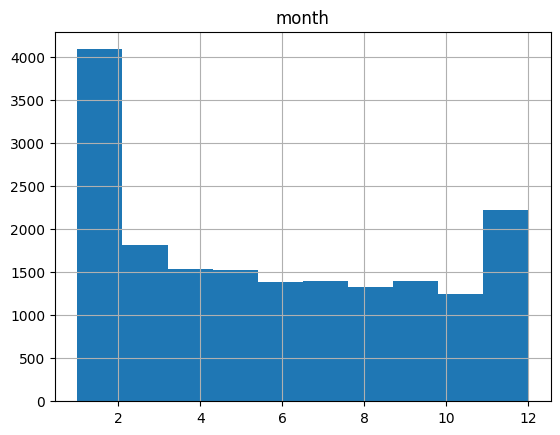

In [82]:
df.hist('month')

In [115]:
# Weird!  Is that real?  What is happeneing?

print(df.month.value_counts())

month
2     2091
1     2002
3     1815
4     1533
5     1526
9     1403
7     1396
6     1384
8     1333
10    1242
11    1151
12    1078
Name: count, dtype: int64


In [88]:
# From my daughter
# My friend's dad is a professional footballer.  Is he in there?  His name is Tom Clarke

df2 = pd.read_csv('../data/fifa_players.csv')
df2.iloc[["Tom Clarke" in xx for xx in df2.full_name]]

['T. Clarke,Tom Clarke,12/21/1987,31,154.94,77.1,"CB,RB",England,71,71,1800000,9000,Right,1,3,2,Normal,3300000,,,,,40,21,68,42,35,26,25,21,41,44,50,57,60,63,67,55,91,66,80,27,85,70,29,34,16,57,74,71,68\n']

In [97]:
df2.loc[14642]

name                              T. Clarke
full_name                        Tom Clarke
birth_date                       12/21/1987
age                                      31
height_cm                            154.94
weight_kgs                             77.1
positions                             CB,RB
nationality                         England
overall_rating                           71
potential                                71
value_euro                        1800000.0
wage_euro                            9000.0
preferred_foot                        Right
international_reputation(1-5)             1
weak_foot(1-5)                            3
skill_moves(1-5)                          2
body_type                            Normal
release_clause_euro               3300000.0
national_team                           NaN
national_rating                         NaN
national_team_position                  NaN
national_jersey_number                  NaN
crossing                        

In [41]:
##################################################################################################################
#
# YouDo:  Run the above steps on your own system.  After exploring the data a bit, write the code
#           which makes a csv file containing each player's height and weight.  Model this on the 
#            Fifa_DoBs.csv file created above
#
#  height_cm, weight_kgs
#  154.94, 77.1
#  ...
#
#
# Stretch goal (optional):  Compute each player's BMI and include it in the csv
#
#  height_cm, weight_kgs, BMI
#  154.94, 77.1, 32.116430800988454
#
#  ...
# 
# Hint:  77.1/((154.94/100)**2) = 32.116430800988454
#
#
# save your results in:
#   /your_repo/students/Module_1/Fifa_HtWt_YourName.csv
#  and 
#   /your_repo/students/Module_1/Fifa_BMI_YourName.csv
# 
#  Include this notebook in the same folder, ensuring you change "YourName" to be your actual name.
########################################  BEGIN STUDENT CODE  #####################################################
#Create file for height and weight
with open('Fifa_HtWt_IrenaFrenkel.csv','w') as outfile:
    
   for theplayer in lines:
        htwt_list = theplayer.split(',')[4:6]
        outfile.write(','.join(htwt_list)+'\n')

#Create file for BMI
with open('Fifa_BMI_IrenaFrenkel.csv','w') as outfile:
    outfile.write('BMI' + '\n')  #add header

    for theplayer in lines[1:]:  #skipping header since can't do calculation on non-integers
        bmi_list = float(theplayer.split(',')[5])/((float(theplayer.split(',')[4])/100)**2) #for calculation,convert to floats
        outfile.write(str(bmi_list) + '\n') #to write to outfile, needed to convert to string
        

#######################################   END STUDENT CODE   #####################################################


In [20]:
for theplayer in lines:
    htwt_list = theplayer.split(',')[4:6]
    print(htwt_list)
#Printing comes out as list, need to join by comma
    

['height_cm', 'weight_kgs']
['170.18', '72.1']
['154.94', '76.2']
['190.5', '83.9']
['162.56', '59']
['187.96', '88.9']
['193.04', '92.1']
['152.4', '73']
['172.72', '69.9']
['193.04', '92.1']
['185.42', '77.1']
['187.96', '76.2']
['198.12', '96.2']
['187.96', '84.8']
['175.26', '73']
['175.26', '71.2']
['152.4', '74.8']
['187.96', '79.8']
['152.4', '67.1']
['185.42', '88.9']
['182.88', '78']
['187.96', '86.2']
['170.18', '60.8']
['175.26', '79.8']
['185.42', '81.2']
['170.18', '68']
['175.26', '69.9']
['185.42', '84.8']
['185.42', '79.8']
['175.26', '78.9']
['154.94', '74.8']
['185.42', '83.9']
['154.94', '74.8']
['185.42', '84.8']
['154.94', '64.9']
['187.96', '78']
['182.88', '76.2']
['154.94', '74.8']
['195.58', '97.1']
['152.4', '68.9']
['154.94', '71.2']
['185.42', '79.8']
['172.72', '74.8']
['187.96', '78.9']
['182.88', '76.2']
['152.4', '67.1']
['170.18', '68']
['195.58', '94.8']
['154.94', '67.1']
['172.72', '63']
['175.26', '74.8']
['175.26', '78']
['187.96', '83']
['190.5', 

In [24]:
for theplayer in lines:
    htwt_list = theplayer.split(',')[4:6]
    print(','.join(htwt_list))



height_cm,weight_kgs
170.18,72.1
154.94,76.2
190.5,83.9
162.56,59
187.96,88.9
193.04,92.1
152.4,73
172.72,69.9
193.04,92.1
185.42,77.1
187.96,76.2
198.12,96.2
187.96,84.8
175.26,73
175.26,71.2
152.4,74.8
187.96,79.8
152.4,67.1
185.42,88.9
182.88,78
187.96,86.2
170.18,60.8
175.26,79.8
185.42,81.2
170.18,68
175.26,69.9
185.42,84.8
185.42,79.8
175.26,78.9
154.94,74.8
185.42,83.9
154.94,74.8
185.42,84.8
154.94,64.9
187.96,78
182.88,76.2
154.94,74.8
195.58,97.1
152.4,68.9
154.94,71.2
185.42,79.8
172.72,74.8
187.96,78.9
182.88,76.2
152.4,67.1
170.18,68
195.58,94.8
154.94,67.1
172.72,63
175.26,74.8
175.26,78
187.96,83
190.5,86.2
154.94,73
172.72,69.9
175.26,72.1
187.96,78.9
193.04,79.8
187.96,78
182.88,73.9
190.5,79.8
152.4,71.2
170.18,62.1
195.58,97.1
170.18,67.1
185.42,81.2
187.96,77.1
175.26,69.9
172.72,73.9
167.64,64
152.4,68
175.26,69.9
187.96,69.9
154.94,69.9
190.5,84.8
154.94,82.1
175.26,69.9
170.18,73
190.5,82.1
182.88,74.8
154.94,76.2
182.88,79.8
172.72,66.2
193.04,83
162.56,60.8
185

In [33]:
for theplayer in lines[1:]:
    bmi_list = float(theplayer.split(',')[5])/((float(theplayer.split(',')[4])/100)**2)
    print(bmi_list)

24.895349411995323
31.7415308305489
23.119157349425812
22.32670480965962
25.16349079447611
24.715250261525455
31.430618416792388
23.43105897284459
24.715250261525455
22.425452995023086
21.568706395265234
24.50859602573906
24.00296984669937
23.766063075079312
23.180050560899275
32.20561996679549
22.58770039819115
28.89033555844889
25.85762349231586
23.321805902871066
24.39924529228167
20.99358175103073
25.979888128648344
23.617986811879053
23.479663800494897
22.756819300658137
24.665089675459896
23.21078014270872
25.686881871558327
31.158353098754038
24.403313959564688
31.158353098754038
24.665089675459896
27.034453423918947
22.078203396728192
22.78361038203558
31.158353098754038
25.384601283623205
29.665337108451993
29.658753216995823
23.21078014270872
25.07357955892382
22.332951897459676
22.78361038203558
28.89033555844889
23.479663800494897
24.783318246009063
27.950875573882296
21.118121821018725
24.35207558925935
25.393875614468307
23.49347284523641
23.75293639476168
30.408553157874